# Probability densities and bayes rule

* Emmanuel Cosme, 2017
* update 5 January 2018

This notebook illustrates graphically what are a density probability, conditional and marginal densities, and Bayes rule.

1. Define a prior density. Plot it along with conditional and marginal densities.
2. Define a likekihood function based on the result of a measurement process. Plot.
3. Apply Bayes rule. Plot posterior density along with conditional and marginal densities.

## Import modules

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

## 1. Prior density

This defines the prior density used later to apply Bayes rule.

In [30]:
x=np.arange(0,10,0.01)
y=np.arange(0,10,0.01)

def density(x,y):
    a = 0.6*(x-4)**2 + 0.4*(y-4)**2
    b = 0.5*(x-7)**2 + 0.5*(y-7)**2
    c = np.exp(-a)+0.5*np.exp(-b)
    c /= np.max(c)
    return c

xm, ym = np.meshgrid(x,y)
pm = density(xm,ym)

### Marginal and conditional densities...

...of the previously defined 2D density. Note that meshgrid switches x and y for the plots...

In [31]:
# Marginal densities p(x) and p(y)
px = np.sum(pm,axis=0)
py = np.sum(pm,axis=1)

# Conditional density p(x|y=3.5)
n1 = 3.5
wy1 = np.argwhere(y==n1).squeeze()
px_y1 = pm[wy1,:]      # conditional density. Note that meshgrid switches x and y...

# Normalize for a fancy plot
px/=np.max(px)
py/=np.max(py)

# Useful axes for plots
y10 = np.ones_like(x)*10   # used later to plot px as a line on the y=10 plane
x0 = np.ones_like(y)*0     # used later to plot py on the x=0 plane
y1 = np.ones_like(x)*n1

### Plot

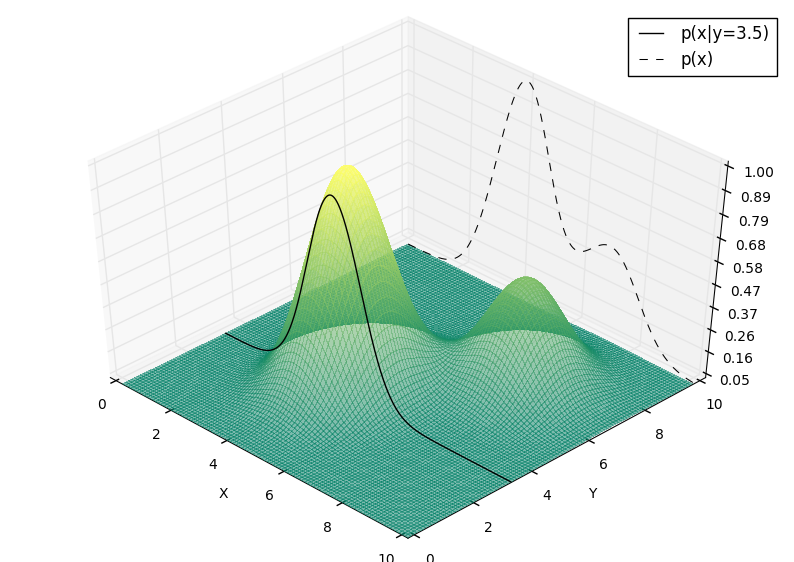

In [32]:
# Start figure
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

ax.plot(x, y1, px_y1, label='p(x|y=3.5)',color='black')
ax.plot(x, y10, px, label='p(x)',color='black',linestyle='dashed',linewidth=0.75)

# Plot the surface.
surf = ax.plot_surface(xm, ym, pm, cmap=cm.summer, alpha=0.5,
                       linewidth=0, antialiased=False)
#coolwarm
# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the z axis.
ax.set_zlim(0.05, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Set viewing angle and elevation
ax.view_init(azim = -45, elev = 45)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.legend()

#plt.savefig('initial_pdf.png')
plt.show()

## 2. Likelihood function

We assume that variable $y$ is observed. The measurement process provides a measurement value $z^o$ and is subject to uncertainties. This results in considering the measurement result as a given likelihood $L(y)$. Below we assume that the measurement uncertainty is an exponential function, and that the measurement value of $y$ is $z^o=6$.


In [33]:
def likelihood(y):
    a = 3*abs(y-6)
    a = np.exp(-a)
    a /= np.max(a)
    return a

# In 2 dimensions
lm = likelihood(ym)

# In 1 dimension
ly = likelihood(y)
ly /= np.max(ly)

### Plot
We plot the likelihood in 1D and 2D (we see that it is not a function of $x$). We also plot the marginal density for $y$, as defined earlier, for comparison with $L(y)$.

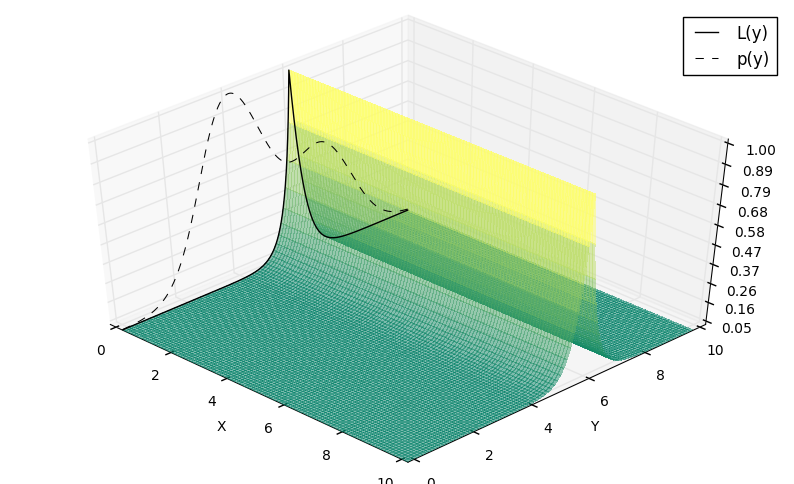

In [34]:
# Start figure
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot(x0, y, ly, label='L(y)',color='black')
ax.plot(x0, y, py, label='p(y)',color='black',linestyle='dashed',linewidth=0.75)

# Plot the surface.
surf = ax.plot_surface(xm, ym, lm, cmap=cm.summer, alpha=0.5,
                       linewidth=0, antialiased=False)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the z axis.
ax.set_zlim(0.05, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Set viewing angle and elevation
ax.view_init(azim = -45, elev = 45)

ax.legend()

#plt.savefig('likelihood.png')
plt.show()

## 3. Bayes rule

Bayes rule consists in the product of the prior density and the likelihood defined above, to provide the posterior density. Below, the marginal posterior densities of $x$ and $y$ are also computed.


In [35]:
pa=pm*lm
pa /= np.max(pa)

pax = np.sum(pa,axis=0)
pax /= np.max(pax)
pay = np.sum(pa,axis=1)
pay /= np.max(pay)

### Plot

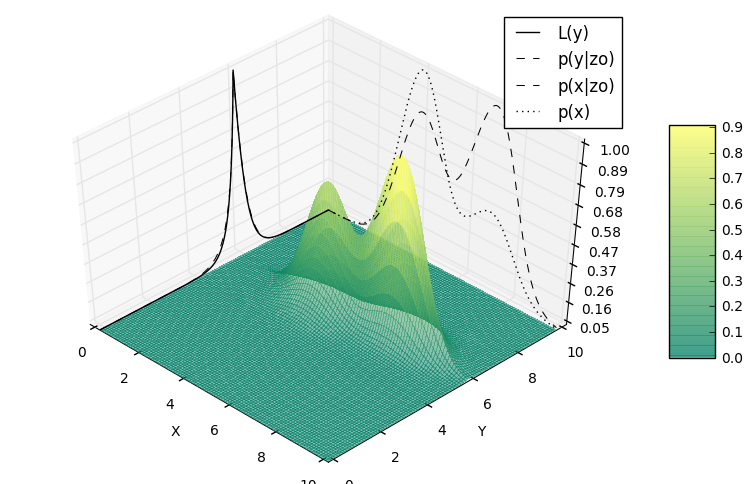

In [36]:
# Start figure
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot(x0, y, ly, label='L(y)',color='black')
ax.plot(x0, y, pay, label='p(y|zo)',color='black',linestyle='dashed',linewidth=0.75)
ax.plot(x, y10, pax, label='p(x|zo)',color='black',linestyle='dashed',linewidth=0.75)
ax.plot(x, y10, px, label='p(x)',color='black',linestyle='dotted',linewidth=1)

# Plot the surface.
surf = ax.plot_surface(xm, ym, pa, cmap=cm.summer, alpha=0.5,
                       linewidth=0, antialiased=False)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the z axis.
ax.set_zlim(0.05, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Set viewing angle and elevation
ax.view_init(azim = -45, elev = 45)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.legend()

#plt.savefig('posterior_pdf_1.png')
plt.show()

#### Another viewing angle

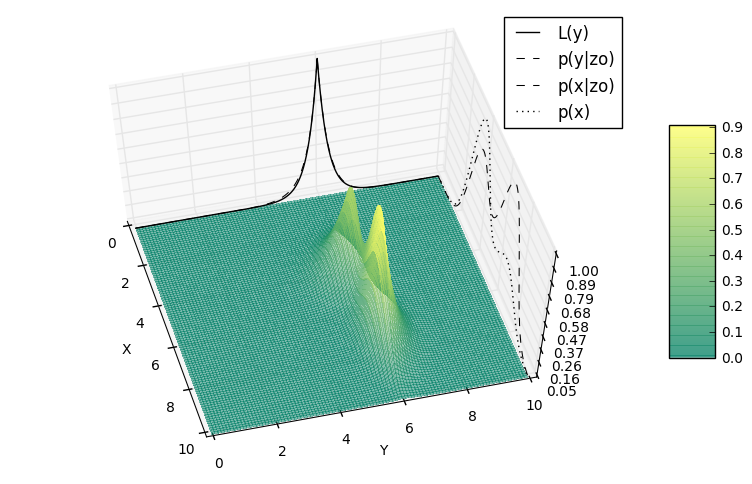

In [37]:
 # Start figure
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot(x0, y, ly, label='L(y)',color='black')
ax.plot(x0, y, pay, label='p(y|zo)',color='black',linestyle='dashed',linewidth=0.75)
ax.plot(x, y10, pax, label='p(x|zo)',color='black',linestyle='dashed',linewidth=0.75)
ax.plot(x, y10, px, label='p(x)',color='black',linestyle='dotted',linewidth=1)

# Plot the surface.
surf = ax.plot_surface(xm, ym, pa, cmap=cm.summer, alpha=0.5,
                       linewidth=0, antialiased=False)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the z axis.
ax.set_zlim(0.05, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Set viewing angle and elevation
ax.view_init(azim = -15, elev = 60)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.legend()

#plt.savefig('posterior_pdf_2.png')
plt.show()